In [9]:
# Import required modules 
import cv2 as cv
import numpy as np
import numpy.typing as npt
import os
from checkerboard import detect_checkerboard

In [10]:
from dataclasses import dataclass

In [11]:
from ImageAnotater import ImageAnnotator
import ipywidgets as widgets

In [12]:
from matplotlib import pyplot as plt

In [13]:
@dataclass
class CameraCalibtationResult():
    ret : bool
    intrinsic_matrix : npt.NDArray
    distortion : npt.NDArray
    r_vecs : npt.NDArray
    t_vecs : npt.NDArray

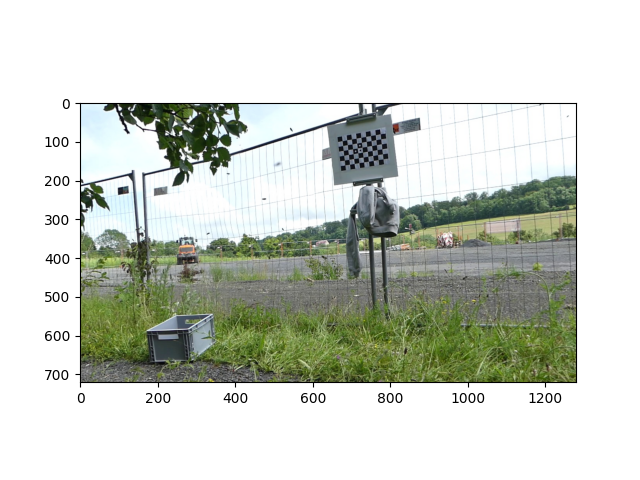

Button(description='Next Image', style=ButtonStyle())

In [15]:
%matplotlib ipympl
image_files = ["test_data/Angle1.jpg",
               "test_data/Angle2.jpg",
               "test_data/Angle3.jpg",
               "test_data/Angle4.jpg"]

annotator = ImageAnnotator(image_files)

button = widgets.Button(description="Next Image")
button.on_click(lambda b: annotator.next_image())
annotator.button = button  # Pass the button to the annotator
display(button)

In [16]:
for im,bbox in zip(image_files,annotator.bounding_boxes):
    print(im,"\n")
    print(bbox,"\n\n")

test_data/Angle1.jpg 

 xmin: 635.6289928805445
 ymin: 58.31718198714725
 widht:188.38709677419342
 heigth:134.1935483870967
 


test_data/Angle2.jpg 

 xmin: 1652.403107673891
 ymin: 893.8870613344254
 widht:309.67741935483855
 heigth:282.32258458291335
 


test_data/Angle3.jpg 

 xmin: 884.0160699659777
 ymin: 669.1451455393145
 widht:282.58064516129025
 heigth:317.41935483870964
 


test_data/Angle4.jpg 

 xmin: 411.09669100853705
 ymin: 544.1158380323839
 widht:185.35483870967755
 heigth:321.6451612903227
 




In [31]:
images = [cv.imread(f,cv.COLOR_BGR2GRAY) for f in image_files]

In [18]:
rois1 = np.s_[60:180,650:810]

rois2 = np.s_[920:1200,1680:2000]

rois3 = np.s_[700:940,890:1175]

rois4 = np.s_[590:830,390:620]

rois = [rois1,rois2,rois3,rois4]

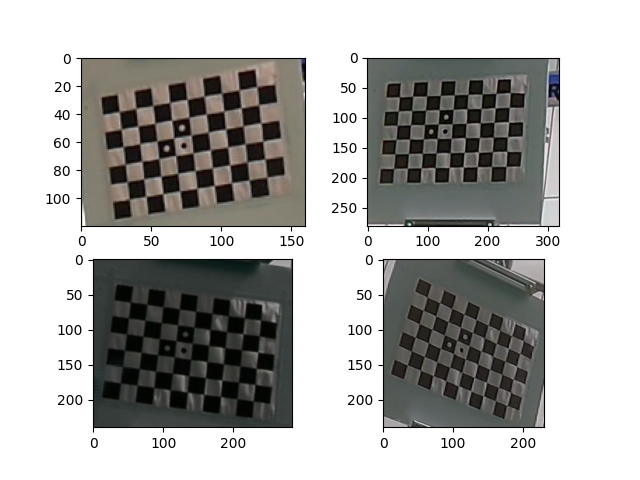

In [19]:
f, axs = plt.subplots(2,2)
for roi, im, ax  in zip(rois,images, axs.flatten()):
    ax.imshow(im[roi])

In [20]:
plt.close("all")

In [21]:
# Define the dimensions of checkerboard 
# this is edgeds in x and y NOT sqares
CHECKERBOARD = (9, 6) 

In [22]:
corners_list = []
scores = []
windows = [5,10,8,10]
for roi, im,win  in zip(rois,images,windows):
    corners, score = detect_checkerboard(im[roi],CHECKERBOARD,winsize=win)
    corners_list.append(corners)
    scores.append(score)

In [23]:
scores

[np.float64(0.03493786286682097),
 np.float64(0.029883703877940475),
 np.float64(0.039290869698758286),
 np.float64(0.047205280572238696)]

In [24]:
corners.shape

(54, 1, 2)

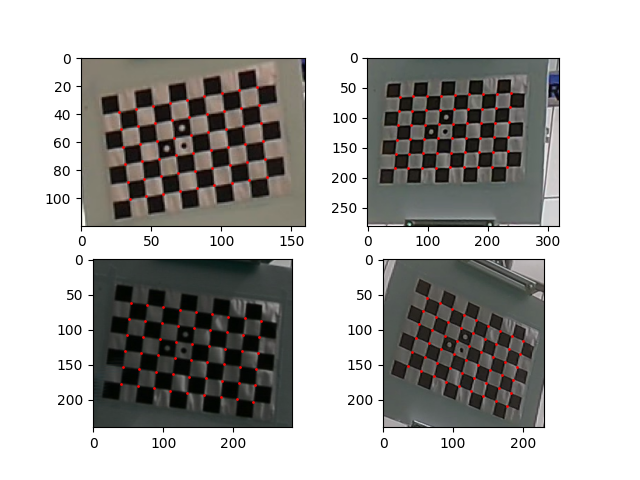

In [25]:
f, axs = plt.subplots(2,2)
for roi, im,c, ax  in zip(rois,images,corners_list, axs.flatten()):
    corners = c #+ np.array([roi[0].start,roi[1].start])
    ax.imshow(im[roi])
    ax.scatter(corners[:,0,0],corners[:,0,1],s=1,c='r')

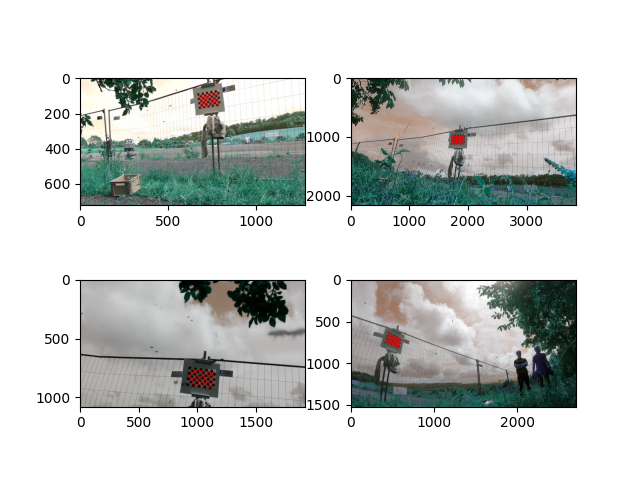

In [26]:
f, axs = plt.subplots(2,2)
original_corners = []
for roi, im,c, ax  in zip(rois,images,corners_list, axs.flatten()):
    corners = c + np.array([roi[1].start,roi[0].start])
    original_corners.append(corners)
    ax.imshow(im)
    ax.scatter(corners[:,0,0],corners[:,0,1],s=0.1,c='r')

In [27]:
#  3D points real world coordinates, theses are the Checker Board Corners 
objectp3d = np.zeros(( CHECKERBOARD[0]  
                      * CHECKERBOARD[1],  
                      3), np.float32) 

In [28]:
for x in range(CHECKERBOARD[0]):
    for y in range(CHECKERBOARD[1]):
        objectp3d[CHECKERBOARD[1]*x+y,:2] = np.array([x,y])

In [29]:
three_d_points = [objectp3d]
camera_calibrations = []
for c,im in zip(original_corners,images):
    two_d_points = [c.astype(np.float32) ]
    ret, matrix, distortion, r_vecs, t_vecs = cv.calibrateCamera( 
                                    three_d_points, 
                                    two_d_points,
                                    im.shape[:2][::-1], # size of the image, since cs graphics its reversed from numpy, just a convention...
                                    None,
                                    None
                                    )
    calib = CameraCalibtationResult(ret = ret,
                                    intrinsic_matrix=matrix,
                                    distortion=distortion,
                                    r_vecs=r_vecs[0],
                                    t_vecs=t_vecs[0])
    camera_calibrations.append(calib)

In [32]:
# print results
camera_calibrations

[CameraCalibtationResult(ret=0.14380019183324796, intrinsic_matrix=array([[1.19056943e+03, 0.00000000e+00, 6.37412367e+02],
        [0.00000000e+00, 1.10133709e+03, 3.58806943e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), distortion=array([[-1.53561765e-01, -4.98980932e+00, -7.91582729e-02,
         -4.04922857e-03,  3.17752398e+01]]), r_vecs=array([[ 0.07167196],
        [ 0.44293855],
        [-0.09695086]]), t_vecs=array([[  3.05638494],
        [-21.16417645],
        [ 92.72158179]])),
 CameraCalibtationResult(ret=0.23835139291830898, intrinsic_matrix=array([[1.99328154e+03, 0.00000000e+00, 1.88768541e+03],
        [0.00000000e+00, 1.96015417e+03, 1.04962535e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), distortion=array([[ 3.52468199e+00, -3.29384258e+02, -1.16453769e-02,
         -2.63979386e-02, -4.07453194e+00]]), r_vecs=array([[-0.22590505],
        [ 0.38151148],
        [ 0.01769105]]), t_vecs=array([[-6.19166235],
        [-2.64958685

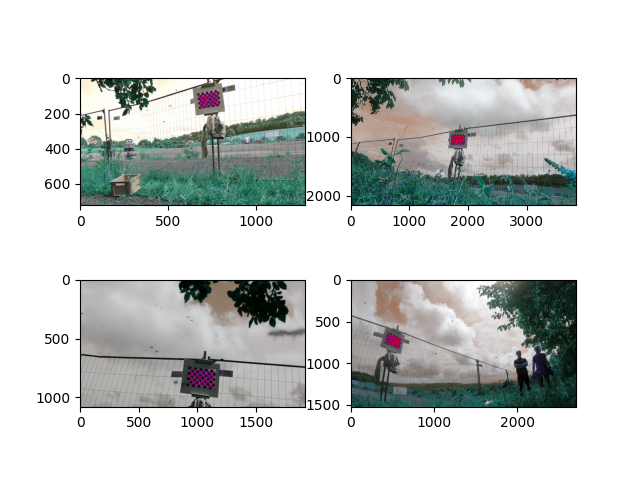

In [30]:
f,axs = plt.subplots(2,2)
for calib,corners,im,ax in zip(camera_calibrations,original_corners,images,axs.flatten()):
    reprojected_points, jacobian = cv.projectPoints(objectp3d,calib.r_vecs, calib.t_vecs,calib.intrinsic_matrix,calib.distortion)
    ax.imshow(im)
    ax.scatter(reprojected_points[:,0,0],reprojected_points[:,0,1],s=0.2,c='b')
    ax.scatter(corners[:,0,0],corners[:,0,1],s=0.1,c='r')

# What now could be further steps here?
In CV:
- undistort images using [undistort](https://docs.opencv.org/3.1.0/da/d54/group__imgproc__transform.html#ga69f2545a8b62a6b0fc2ee060dc30559d)
- Use [stereocalibrate](https://docs.opencv.org/3.0-beta/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#stereocalibrate) to calibrate the cameras pairwise
- rectify images to make matching easiert using [stereoRectify](https://docs.opencv.org/3.1.0/d9/d0c/group__calib3d.html#ga617b1685d4059c6040827800e72ad2b6)
- match points in the rectified image using suitable tools, make use of the fact that epi polar lines are paralel in the images now. The epi lines can be found using [computeCorrespondEpilines](https://docs.opencv.org/3.1.0/d9/d0c/group__calib3d.html#ga19e3401c94c44b47c229be6e51d158b7). This
- use the projection matrices returned by retify to project back to 3d using [triangulatepoints](https://docs.opencv.org/3.0-beta/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#triangulatepoints)